# MNIST

## 加载mnist训练集

In [90]:
import pandas as pd
# 2D绘图工具
import matplotlib as mplot
# 2D高阶绘图工具
import seaborn as sns
# 设置格式
sns.set(context="notebook",style="whitegrid",palette="dark")
# 3D绘图工具
import mpl_toolkits.mplot3d as mplot3d
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

# from tensorflow.keras import layers
# import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data(path='MNIST/mnist.npz')
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 可视化数据集


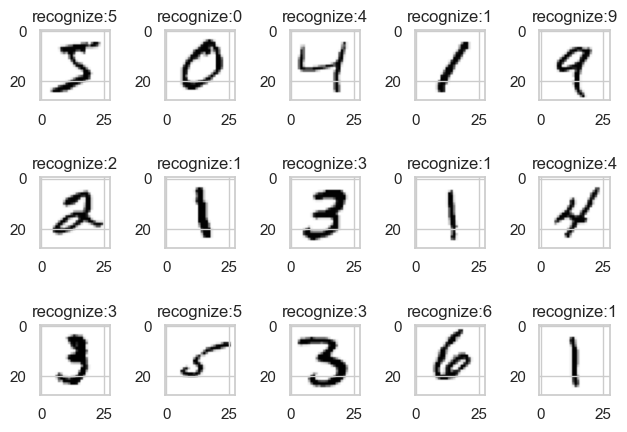

In [91]:
fig = plt.figure()
# plt.clf()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap='Greys')
    plt.title("recognize:{}".format(y_train[i]))
    # plt.xticks([])
    # plt.yticks([])

## 数据处理：规范化

In [92]:
X_train=x_train.reshape(60000,784)
X_test=x_test.reshape(10000,784)
# 转型成为float32
X1_train=X_train.astype('float32')
X1_test=X_test.astype('float32')
#数据归一化
X1_train /= 255
X1_test /= 255

## 统计训练数据中各种标签

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


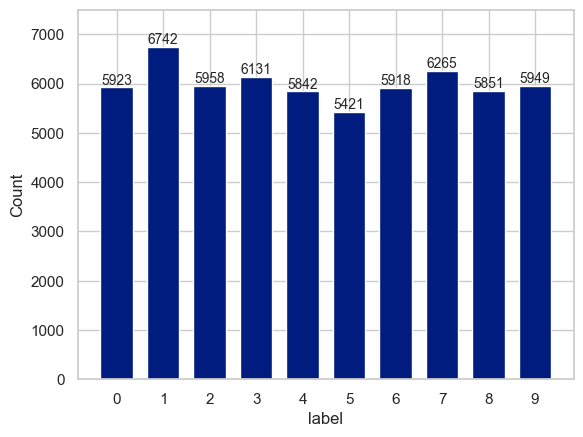

In [93]:
label,count = np.unique(y_train,return_counts=True)
print(label,count)
fig=plt.figure()
plt.bar(label,count,width=0.7,align="center")
plt.xlabel("label")
plt.ylabel("Count")
plt.xticks(label)
plt.ylim(0,7500)

for a,b in zip(label,count):
    plt.text(a,b,'%d' % b, ha="center",va="bottom",fontsize=10)
plt.show()

## One-Hot 编码

In [94]:
from keras.utils import np_utils
n_class = 10
print("before one-hot: ",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_class)
print("after one-hot encoding: ", Y_train.shape)
Y_test = np_utils.to_categorical(y_test,n_class)

before one-hot:  (60000,)
after one-hot encoding:  (60000, 10)


## 定义softmax神经网络

In [95]:
# 引入神经网络，神经元和激活函数
from keras.models import Sequential
from keras.layers.core import Dense,Activation
model = Sequential()
# 定义这一层有512个神经元，激活函数用relu
model.add(Dense(1024,input_shape=(784,)))
model.add(Activation('relu'))
# 第二层有一个512个神经元，激活函数用relu
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

# 第三层有10个激活函数，用softmax激活函数
model.add(Dense(10))
model.add(Activation('softmax'))

## 编译模型

In [96]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'],optimizer='adam')
history=model.fit(X1_train,Y_train,batch_size=128,epochs=5,verbose=2,validation_data=(X1_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5


2023-01-24 18:37:33.810917: W tensorflow/c/c_api.cc:291] Operation '{name:'training_10/Adam/beta_1/Assign' id:10331 op device:{requested: '', assigned: ''} def:{{{node training_10/Adam/beta_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_10/Adam/beta_1, training_10/Adam/beta_1/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/Users/baodan/.pyenv/versions/env-3.9.2/lib/python3.9/site-packages/keras/engine/training_v1.py:2333: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-01-24 18:37:35.965666: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_32/mul' id:10259 op device:{requested

60000/60000 - 2s - loss: 0.2048 - accuracy: 0.9372 - val_loss: 0.0922 - val_accuracy: 0.9714 - 2s/epoch - 38us/sample
Epoch 2/5
60000/60000 - 2s - loss: 0.0782 - accuracy: 0.9753 - val_loss: 0.0832 - val_accuracy: 0.9737 - 2s/epoch - 36us/sample
Epoch 3/5
60000/60000 - 2s - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0880 - val_accuracy: 0.9749 - 2s/epoch - 35us/sample
Epoch 4/5
60000/60000 - 2s - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0875 - val_accuracy: 0.9755 - 2s/epoch - 35us/sample
Epoch 5/5
60000/60000 - 2s - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0751 - val_accuracy: 0.9797 - 2s/epoch - 36us/sample


## 训练结果可视化

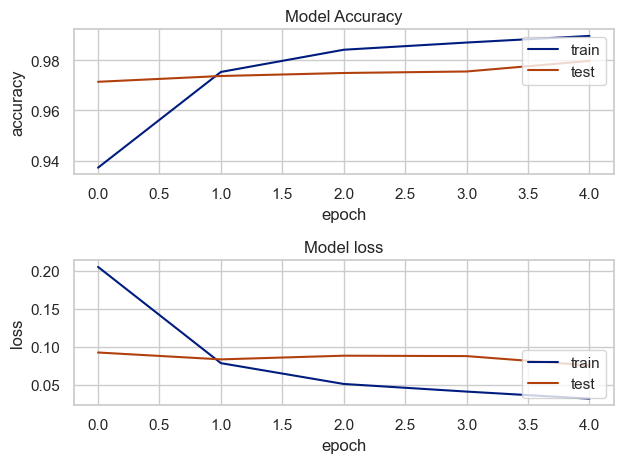

In [97]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc="lower right")
plt.tight_layout()
plt.show()

## 保存模型

In [98]:
import os
import tensorflow.compat.v1.gfile as gfile
tf.compat.v1.disable_eager_execution()
save_dir='./MNIST/model/'
if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)
model_name='keras_mnist.h5'
model_path=os.path.join(save_dir,model_name)
model.save(model_path)

## 重新加载模型

In [102]:
from keras.models import load_model
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)
print("Test loss is:{}% \n".format(loss_and_metrics[0]))
print("Test accuracy is :{}% \n".format(loss_and_metrics[1]*100))

predicted_class = mnist_model.predict(X_test)
correct_indices = np.nonzero(predicted_class  == Y_test)[0]
incorrect_indices = np.nonzero(predicted_class != Y_test)[0]
print('Classified correctly count: {}'.format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

2023-01-24 18:39:08.739441: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_26_4/bias/Assign' id:11823 op device:{requested: '', assigned: ''} def:{{{node dense_26_4/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_26_4/bias, dense_26_4/bias/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-01-24 18:39:09.073372: W tensorflow/c/c_api.cc:291] Operation '{name:'count_36/Assign' id:11920 op device:{requested: '', assigned: ''} def:{{{node count_36/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](count_36, count_36/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either

Test loss is:15.665630021109449% 

Test accuracy is :97.82999753952026% 



/Users/baodan/.pyenv/versions/env-3.9.2/lib/python3.9/site-packages/keras/engine/training_v1.py:2357: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-01-24 18:39:09.831774: W tensorflow/c/c_api.cc:291] Operation '{name:'activation_27_4/Softmax' id:11877 op device:{requested: '', assigned: ''} def:{{{node activation_27_4/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_28_4/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Classified correctly count: 99534
Classified incorrectly count: 466
